In [1]:
%matplotlib inline
import cv2
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:
cv2

<module 'cv2' from '/home/kian/anaconda3/lib/python3.5/site-packages/cv2.cpython-35m-x86_64-linux-gnu.so'>

In [5]:
def display_images(img_array):
    
    cmap = None
    
    #set up dims of subplot arrangement
    rows = len(img_array)/3+1
    cols = 3
    
    #make each image visible
    plt.figure(figsize=(20, 20))
    
    #add each image to plot
    for i, img in enumerate(img_array):
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(img.shape)==2 else cmap
        
        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap=cmap)
    
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

In [6]:
def gray_and_blur(img, k_size=13):
    
    #convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #blur image
    img = cv2.GaussianBlur(img, (k_size, k_size), 0)
    
    return img

def pre_edge(imgs, k_size=13):
    processed = []
    
    for img in imgs:
        
        processed.append(gray_and_blur(img, k_size))
        
    return processed


def get_edges(imgs, low_t=40, high_t=120, k_size=17):
    edged = []
    #process images
    processed = pre_edge(imgs, k_size=k_size)
    
    for img in processed:
        edged.append(cv2.Canny(img, low_t, high_t))
        
    return edged

In [9]:
def find_cancer(imgs):
    edge_imgs = get_edges(imgs)
    
    cntrs = []

    
    for img in edge_imgs:
        _ , contours, hierarchy = cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cntrs.append(contours)
    
    max_cntrs = []
    
    for img_cntrs in cntrs:
        
        areas = []
        
        for cntr in img_cntrs:
            areas.append(cv2.contourArea(cntr))
        
        max_index = (areas.index(max(areas)))
        
        max_cntrs.append(contours[max_index])
    
    final_images = []
    
    for cnt, img in zip(max_cntrs, imgs):
        
        final_images.append(cv2.drawContours(img, cnt, -1, (0,255,0), 3))
    
    morph_imgs = []
    
    for img in final_images:

        se = np.ones((11,11), dtype='uint8')
        morph_imgs.append(cv2.morphologyEx(img, cv2.MORPH_CLOSE, se))
        
    display_images(morph_imgs)
        
        
    
    

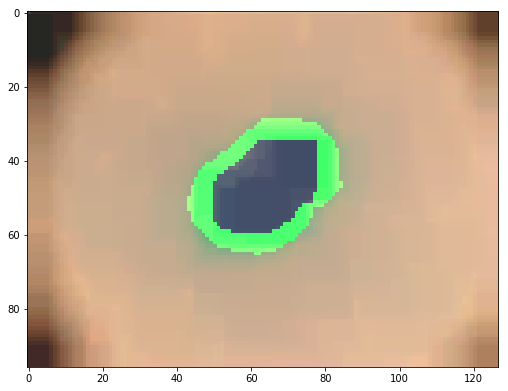

In [10]:
img = cv2.imread('cancer.jpeg')
find_cancer([img])

In [46]:
def find_cancer(img):
    
    img = img.copy()
    
    edge = get_edges([img])[0]
    
    _ , contours, hierarchy = cv2.findContours(edge,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    areas = []
    
    for cntr in contours:
        areas.append(cv2.contourArea(cntr))

    max_index = (areas.index(max(areas)))

    max_cntr = contours[max_index]
    
    img = cv2.drawContours(img, max_cntr, -1, (0,255,0), 3)

    se = np.ones((12,12), dtype='uint8')
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se)
    
    display_images([img])
    
    return img

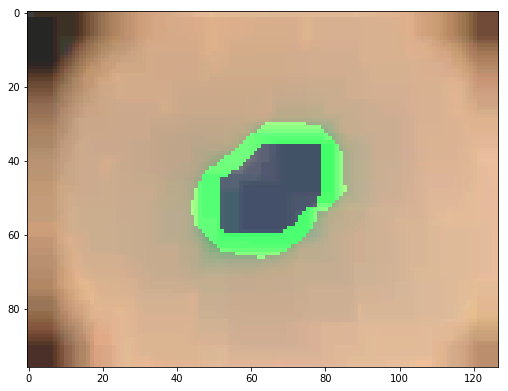

array([[[ 61,  61,  61],
        [ 61,  61,  61],
        [ 61,  48,  37],
        ..., 
        [114,  74,  56],
        [114,  74,  56],
        [114,  74,  56]],

       [[ 61,  61,  61],
        [ 61,  61,  61],
        [ 61,  48,  37],
        ..., 
        [114,  74,  56],
        [114,  74,  56],
        [114,  74,  56]],

       [[ 38,  38,  37],
        [ 38,  38,  37],
        [ 38,  38,  37],
        ..., 
        [114,  74,  56],
        [114,  74,  56],
        [114,  74,  56]],

       ..., 
       [[ 74,  48,  40],
        [ 74,  48,  40],
        [ 74,  48,  40],
        ..., 
        [187, 142, 109],
        [187, 142, 109],
        [187, 142, 109]],

       [[ 74,  48,  40],
        [ 74,  48,  40],
        [ 74,  48,  40],
        ..., 
        [187, 142, 109],
        [187, 142, 109],
        [187, 142, 109]],

       [[ 74,  48,  40],
        [ 74,  48,  40],
        [ 74,  48,  40],
        ..., 
        [187, 142, 109],
        [187, 142, 109],
        [187, 142,

In [49]:
img = cv2.imread('cancer.jpeg')
find_cancer(img)